# INFO 204 Assignment

Importing all the packages from libraries that are needed for this assignment.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.metrics import make_scorer, confusion_matrix, precision_recall_fscore_support, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression

## Section 1 - load data and conduct Explainatory Data Analysis (EDA)

In [33]:
boston = pd.read_csv('./modified_boston.csv', index_col=0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,11.292897
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,15.113707
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,26.034624
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,29.201223
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,24.099477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,12.242679
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,17.066060
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,11.036473
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,13.672169


In [34]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [35]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,15.606038
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.480268
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,1.134841
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,10.492041
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,13.099290
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,16.967099
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,48.819313


#### Pair plot

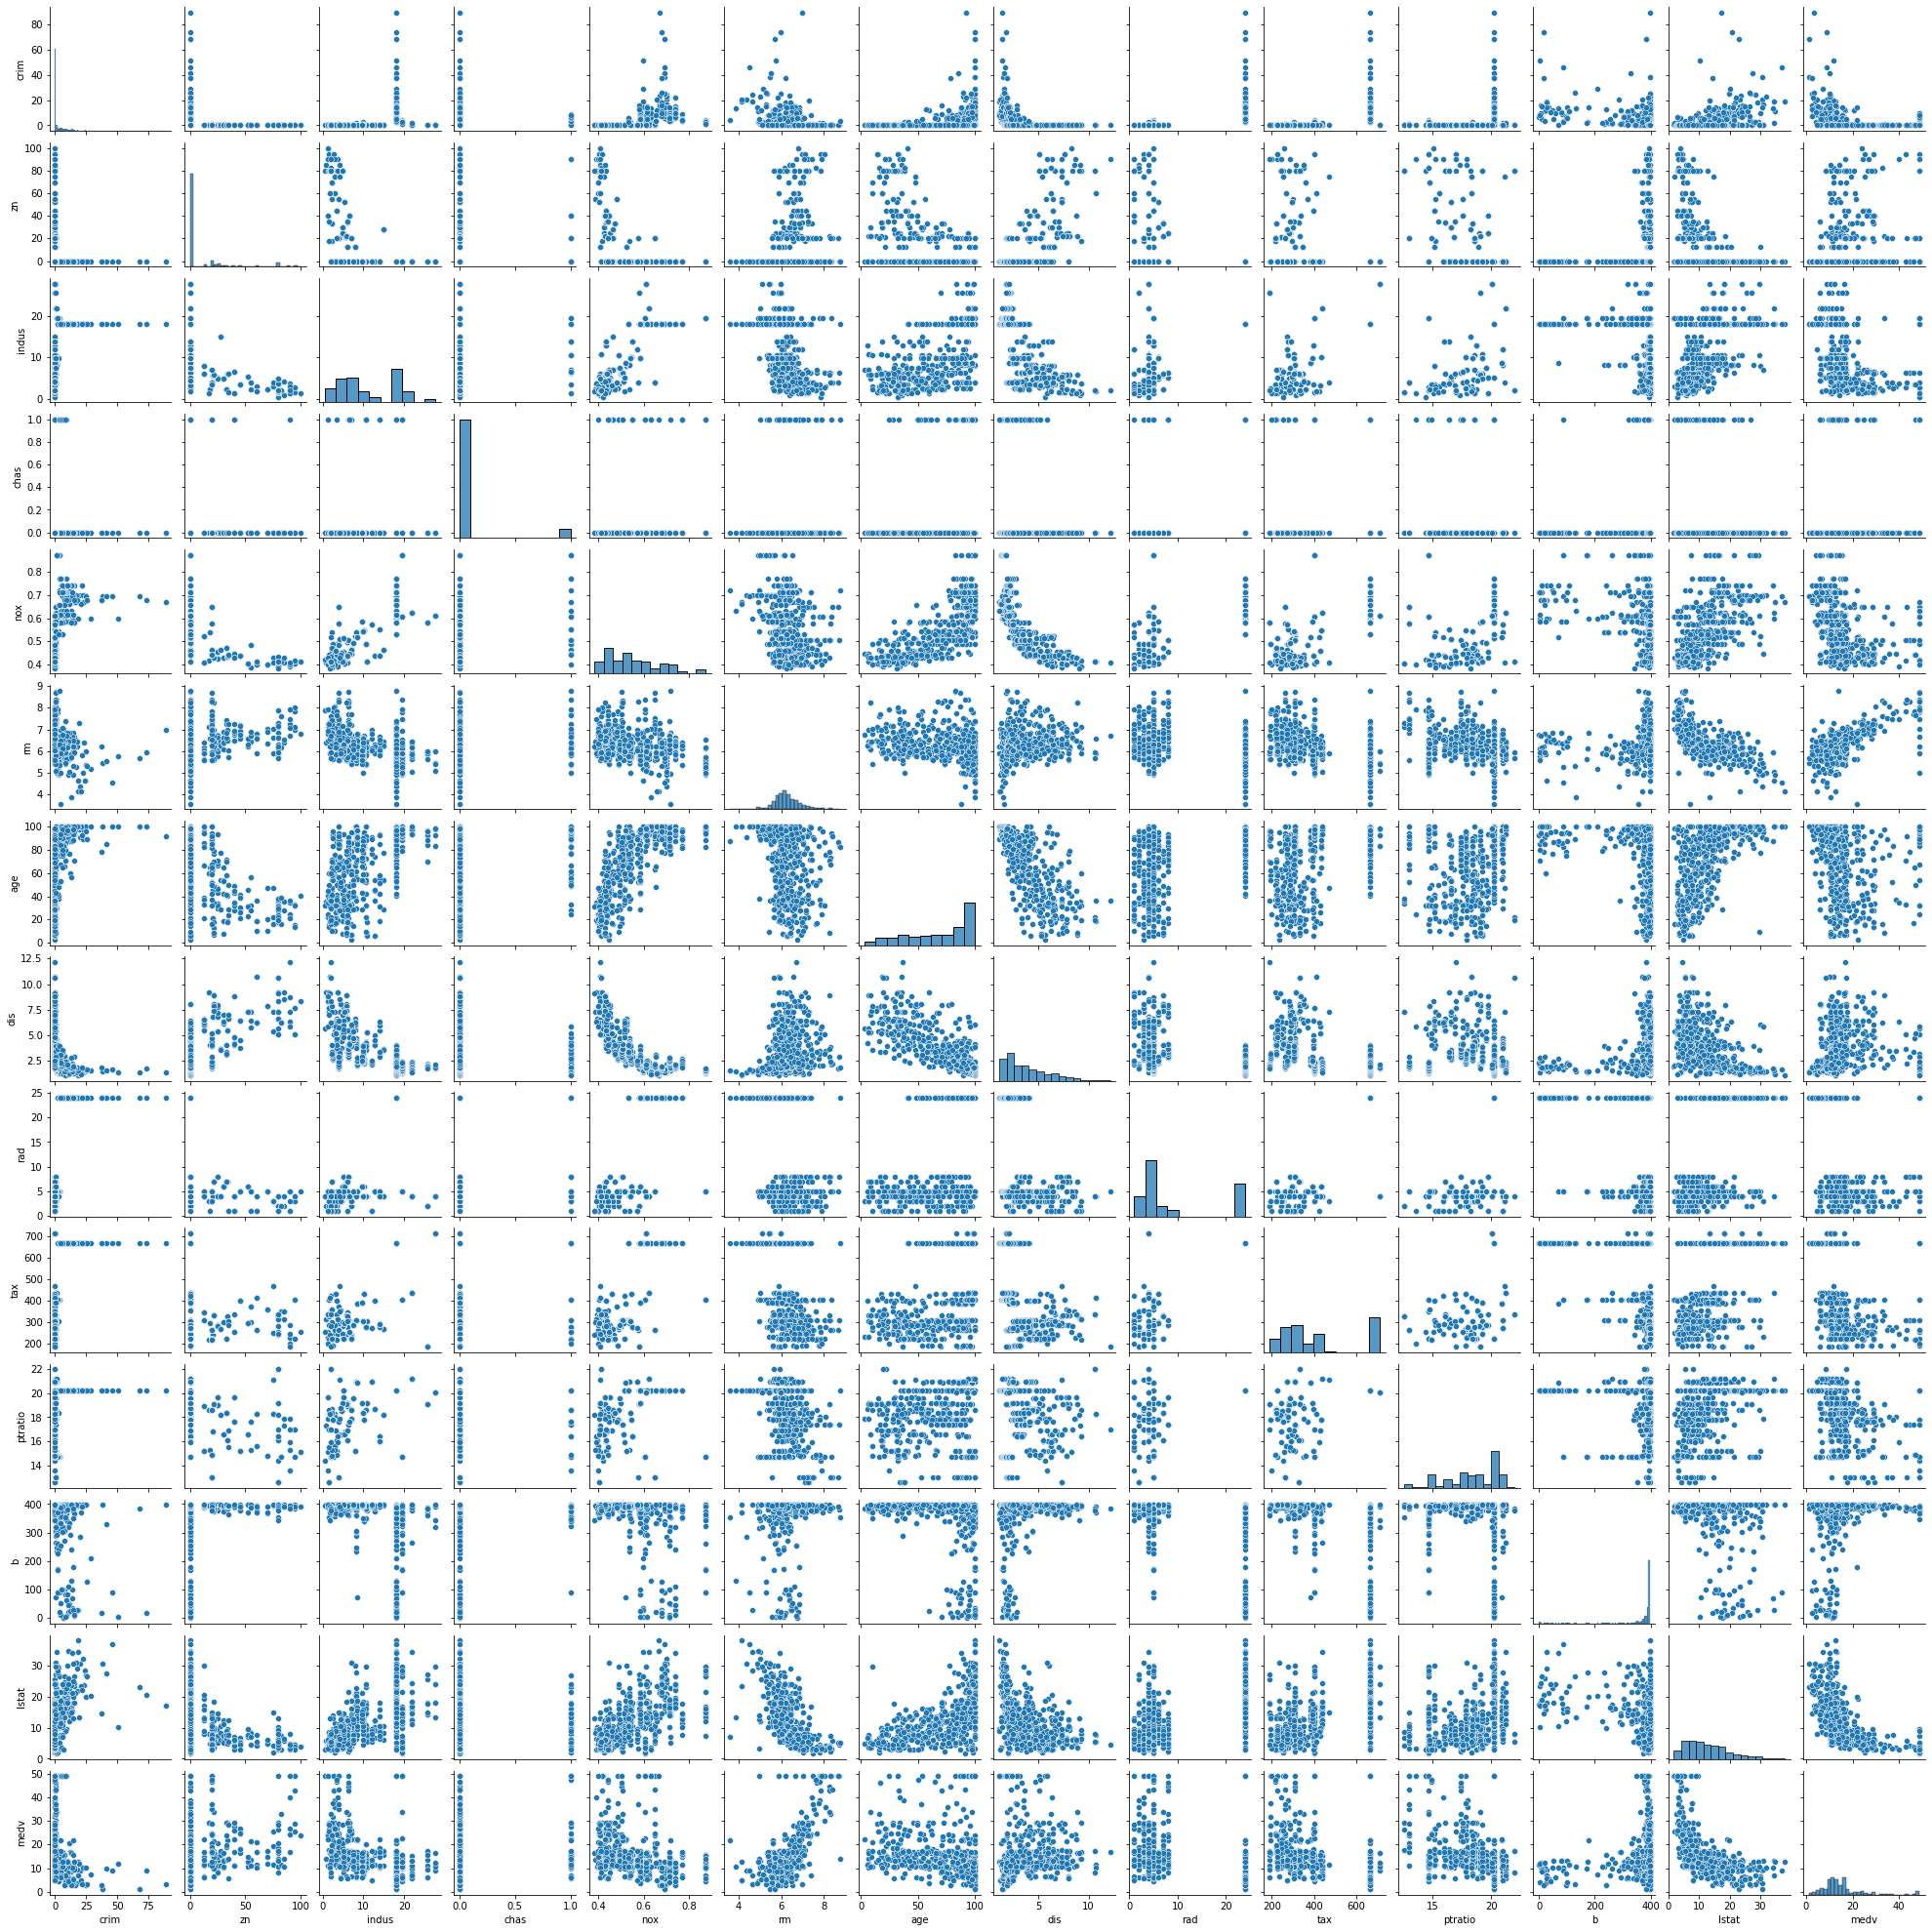

In [6]:
sns.pairplot(boston, height=2)

#### Correlation Heatmap

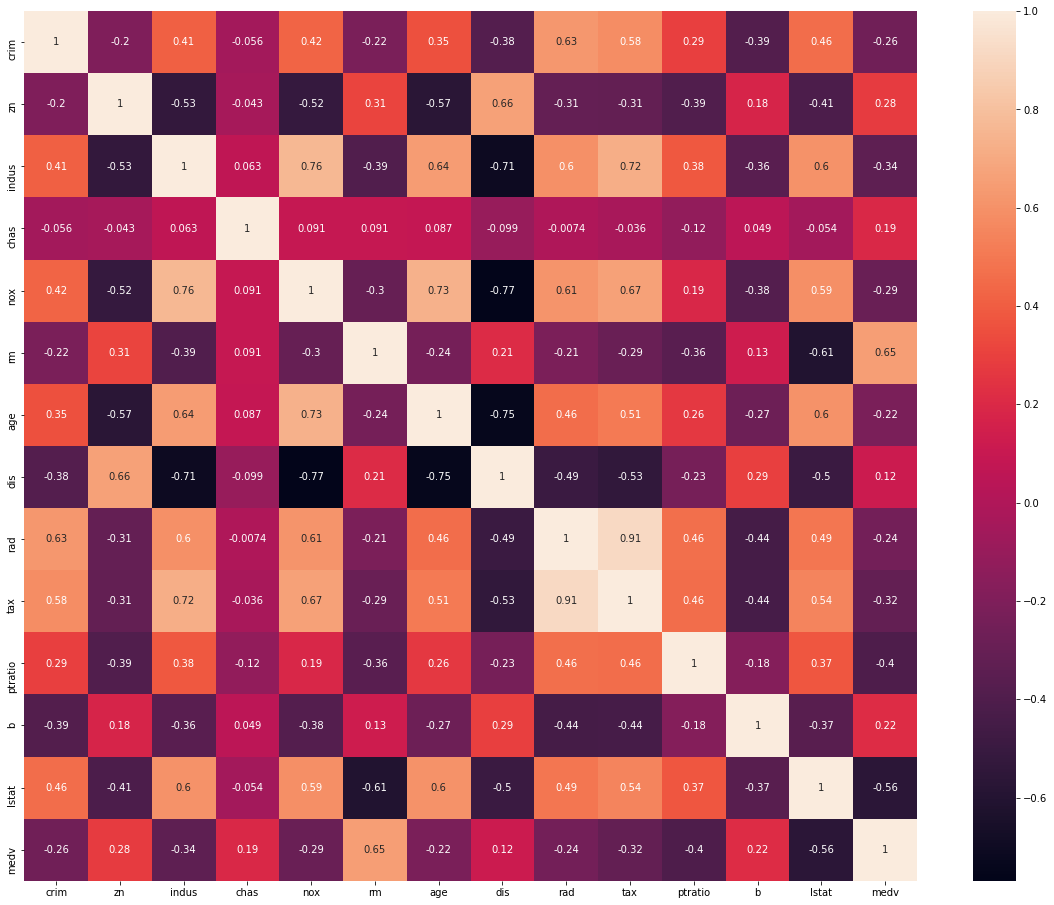

In [36]:
plt.figure(figsize=(20, 16))
sns.heatmap(boston.corr(), annot=True)
plt.show()

#### Removing Varialbes

The features dis, nox and age are strongly correlated. This means they are redundant features, and two of the three features must be removed as they do not provide any additional information. The features that will be removed are dis and age as they both are less correlated to the target feature than the nox feature.

In [37]:
remove_columns = ['chas', 'rad', 'age']
boston_EDA = boston.drop(columns=remove_columns)

#### Transforming Variables

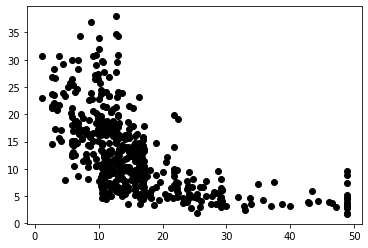

In [38]:
plt.plot(boston_EDA['medv'], boston_EDA['lstat'], 'o', color='black')

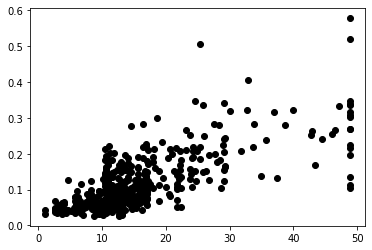

In [39]:
boston_EDA['lstat'] = 1/(boston_EDA['lstat'])
plt.plot(boston_EDA['medv'], boston_EDA['lstat'], 'o', color='black')


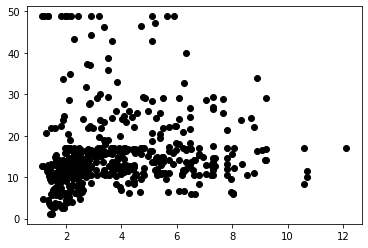

In [40]:
plt.plot(boston_EDA['dis'], boston_EDA['medv'], 'o', color='black')

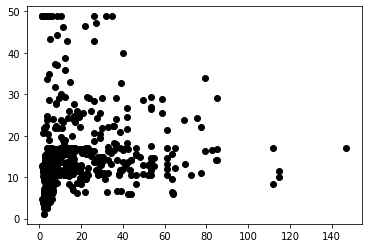

In [41]:
boston_EDA['dis'] = np.square(boston_EDA['dis'])
plt.plot(boston_EDA['dis'], boston_EDA['medv'], 'o', color='black')

## Section 2 - Hyperparameter Analysis

In [61]:
target = 'medv'
X = boston_EDA.drop(columns=[target]).to_numpy()
y = boston_EDA[target].to_numpy()

#### K-Nearest Neighbours Regressor

In [43]:
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'knn__n_neighbors': [ 1, 2, 3, 6, 10, 17, 31, 54, 96, 170, 300 ]
}
cv = GridSearchCV(pipe, param_grid=param_grid, cv=rkf)
cv.fit(X, y)

best_k = cv.best_params_
best_perf = cv.best_score_
print(best_k)
print(best_perf)

{'knn__n_neighbors': 3}
0.6656217345993564


In [44]:
cv_data = pd.DataFrame(cv.cv_results_)
cv_data


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002315,0.000923,0.001969,0.000746,1,{'knn__n_neighbors': 1},0.538681,0.743021,0.499495,-0.042686,...,0.638203,0.690666,0.787607,0.783849,0.717283,0.701302,0.425134,0.602101,0.201852,6
1,0.002382,0.000788,0.002633,0.001749,2,{'knn__n_neighbors': 2},0.639375,0.740544,0.604625,0.082338,...,0.648789,0.788943,0.773990,0.741617,0.797448,0.765080,0.484632,0.657400,0.153984,2
2,0.008313,0.019552,0.004229,0.005144,3,{'knn__n_neighbors': 3},0.545825,0.752502,0.679034,0.292236,...,0.745301,0.815213,0.856379,0.665730,0.786441,0.808290,0.486489,0.665622,0.151444,1
3,0.003093,0.001640,0.002624,0.001334,6,{'knn__n_neighbors': 6},0.597196,0.715618,0.699581,0.318588,...,0.704721,0.815836,0.730487,0.755608,0.719534,0.788442,0.545246,0.649063,0.148157,3
4,0.002488,0.001808,0.002071,0.000846,10,{'knn__n_neighbors': 10},0.576215,0.687913,0.710570,0.336638,...,0.712807,0.746137,0.700609,0.748681,0.694107,0.767151,0.500595,0.635516,0.134561,4
5,0.006683,0.013717,0.004429,0.004979,17,{'knn__n_neighbors': 17},0.571666,0.638871,0.750432,0.376107,...,0.725642,0.702795,0.637037,0.733165,0.583575,0.716429,0.537372,0.606008,0.133997,5
6,0.001718,0.000650,0.001721,0.000335,31,{'knn__n_neighbors': 31},0.559439,0.580770,0.723615,0.379497,...,0.665545,0.656288,0.557811,0.679196,0.461829,0.669866,0.525661,0.550854,0.136602,7
7,0.001641,0.000538,0.002429,0.001890,54,{'knn__n_neighbors': 54},0.507697,0.471139,0.609893,0.343397,...,0.598569,0.538596,0.456824,0.607391,0.368178,0.602995,0.436161,0.467645,0.120945,8
8,0.001812,0.002176,0.002154,0.000754,96,{'knn__n_neighbors': 96},0.437887,0.333567,0.504097,0.323579,...,0.508366,0.467610,0.422468,0.468073,0.270365,0.471084,0.425940,0.392474,0.107590,9
9,0.001812,0.000745,0.003536,0.001768,170,{'knn__n_neighbors': 170},0.349917,0.206364,0.372806,0.332578,...,0.399886,0.319798,0.320466,0.316721,0.193294,0.347247,0.337496,0.297062,0.083512,10


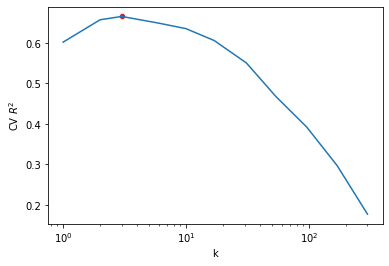

In [45]:
ax = sns.lineplot(data=cv_data, x='param_knn__n_neighbors', y='mean_test_score')
sns.scatterplot(data=cv_data.iloc[[cv.best_index_]], x='param_knn__n_neighbors', y='mean_test_score', color='#ce2227');
ax.set_xlabel('k')
ax.set_ylabel('CV $R^{2}$')
ax.set_xscale('log');

#### Decision Tree Regressor

In [46]:
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeRegressor())
])

param_grid = {
    'decision_tree__min_samples_split':  [ 2, 5, 10, 20, 40, 80, 120, 360]
}
cv = GridSearchCV(pipe, param_grid=param_grid, cv=rkf)
cv.fit(X, y)

best_k = cv.best_params_
best_perf = cv.best_score_
print(best_k)
print(best_perf)

{'decision_tree__min_samples_split': 40}
0.6347540057556402


In [47]:
cv_data = pd.DataFrame(cv.cv_results_)
cv_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009883,0.014742,0.001088,0.000626,2,{'decision_tree__min_samples_split': 2},0.493613,0.775790,0.591302,-0.275173,...,0.441147,0.704068,0.820135,0.503680,0.611222,0.666155,0.538438,0.532893,0.237112,6
1,0.004455,0.001074,0.000650,0.000215,5,{'decision_tree__min_samples_split': 5},0.549417,0.809894,0.608552,-0.180109,...,0.399259,0.719714,0.814992,0.509479,0.615736,0.664852,0.580155,0.532625,0.218386,7
2,0.005019,0.002114,0.000977,0.001531,10,{'decision_tree__min_samples_split': 10},0.630226,0.782611,0.713291,-0.166798,...,0.510312,0.738467,0.832544,0.503422,0.634275,0.720544,0.559126,0.564278,0.216056,5
3,0.003941,0.001754,0.000642,0.000461,20,{'decision_tree__min_samples_split': 20},0.612527,0.819510,0.720632,0.338924,...,0.542915,0.775193,0.823426,0.520382,0.545769,0.714681,0.589341,0.608480,0.157904,2
4,0.003049,0.000747,0.000508,0.000110,40,{'decision_tree__min_samples_split': 40},0.676821,0.829860,0.748932,0.276474,...,0.498278,0.788935,0.828292,0.550391,0.509278,0.755650,0.633541,0.634754,0.166997,1
5,0.008394,0.015094,0.001648,0.002650,80,{'decision_tree__min_samples_split': 80},0.704169,0.842495,0.748886,0.046816,...,0.414175,0.746502,0.854400,0.563590,0.502091,0.773050,0.564245,0.588502,0.182486,3
6,0.002666,0.000629,0.000559,0.000097,120,{'decision_tree__min_samples_split': 120},0.719769,0.846074,0.772251,0.068729,...,0.420822,0.744791,0.848555,0.572652,0.499989,0.758698,0.549236,0.588065,0.175008,4
7,0.001448,0.000180,0.000404,0.000053,360,{'decision_tree__min_samples_split': 360},0.549073,0.689924,0.588349,0.001600,...,0.558896,0.692948,0.624455,0.488401,0.501178,0.607853,0.481393,0.471559,0.197369,8


ax = sns.lineplot(data=cv_data, x='param_decision_tree__min_samples_split', y='mean_test_score')
sns.scatterplot(data=cv_data.iloc[[cv.best_index_]], x='param_decision_tree__min_samples_split', y='mean_test_score', color='#ce2227');
ax.set_xlabel('k')
ax.set_ylabel('CV $R^{2}$')
ax.set_xscale('log');

## Section 3 - Performance Analysis

#### Linear Regression with EDA

In [48]:
pipe = Pipeline([
    ( 'scaler', StandardScaler()),
    ( 'lm', LinearRegression())
])
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)
lm_EDA_perf = np.mean(cross_val_score(pipe, X, y, cv=rkf))
print(lm_EDA_perf)

0.536160936887603


#### Linear Regression without EDA

In [49]:
target = 'medv'
X_raw = boston.drop(columns=[target]).to_numpy()
y_raw = boston[target].to_numpy()

In [50]:
pipe = Pipeline([
    ( 'scaler', StandardScaler()),
    ( 'lm_NO_EDA', LinearRegression())
])
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)
lm_perf = np.mean(cross_val_score(pipe, X_raw, y_raw, cv=rkf))
print(lm_perf)

0.442723834044626


#### K-Nearest Neighbours Regression

In [51]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3))
])
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)
knn_perf = np.mean(cross_val_score(pipe, X, y, cv=rkf))
print(lm_perf)


0.442723834044626


#### Decision Tree Regression

In [52]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', DecisionTreeRegressor(min_samples_split=40))
])
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)
dt_perf = np.mean(cross_val_score(pipe, X, y, cv=rkf))
print(dt_perf)

0.6347540057556402


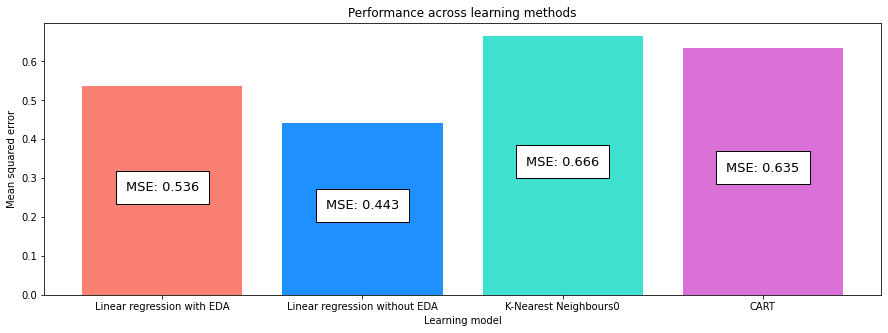

In [53]:
def addLabel(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, "MSE: {}".format(round(y[i], 3)), ha = 'center', fontsize=13, bbox={'facecolor': 'white', 'pad': 10})
x = ['Linear regression with EDA', 'Linear regression without EDA', 'K-Nearest Neighbours0', 'CART']
y = [lm_EDA_perf, lm_perf, knn_perf, dt_perf]
color = ['salmon', 'dodgerblue', 'turquoise', 'orchid']
plt.figure(figsize=(15, 5))
plt.bar(x, y, color=color)
addLabel(x, y)
plt.title('Performance across learning methods')
plt.xlabel('Learning model')
plt.ylabel('Mean squared error')
plt.show()

The k-Nearest Neighbours has the highest performance. It has the highest mean quared error of 0.666. The model with next highest perfornace is Decision Tree Regressor (CART) which has a mean quared error of 0.635. The Linear Regression has the lowest performance. To explore the effect of EDA, we fit two Linear Regression one with the original data and one with the data that has gone through EDA. 

## Section 4 - Analysing Decision Tree

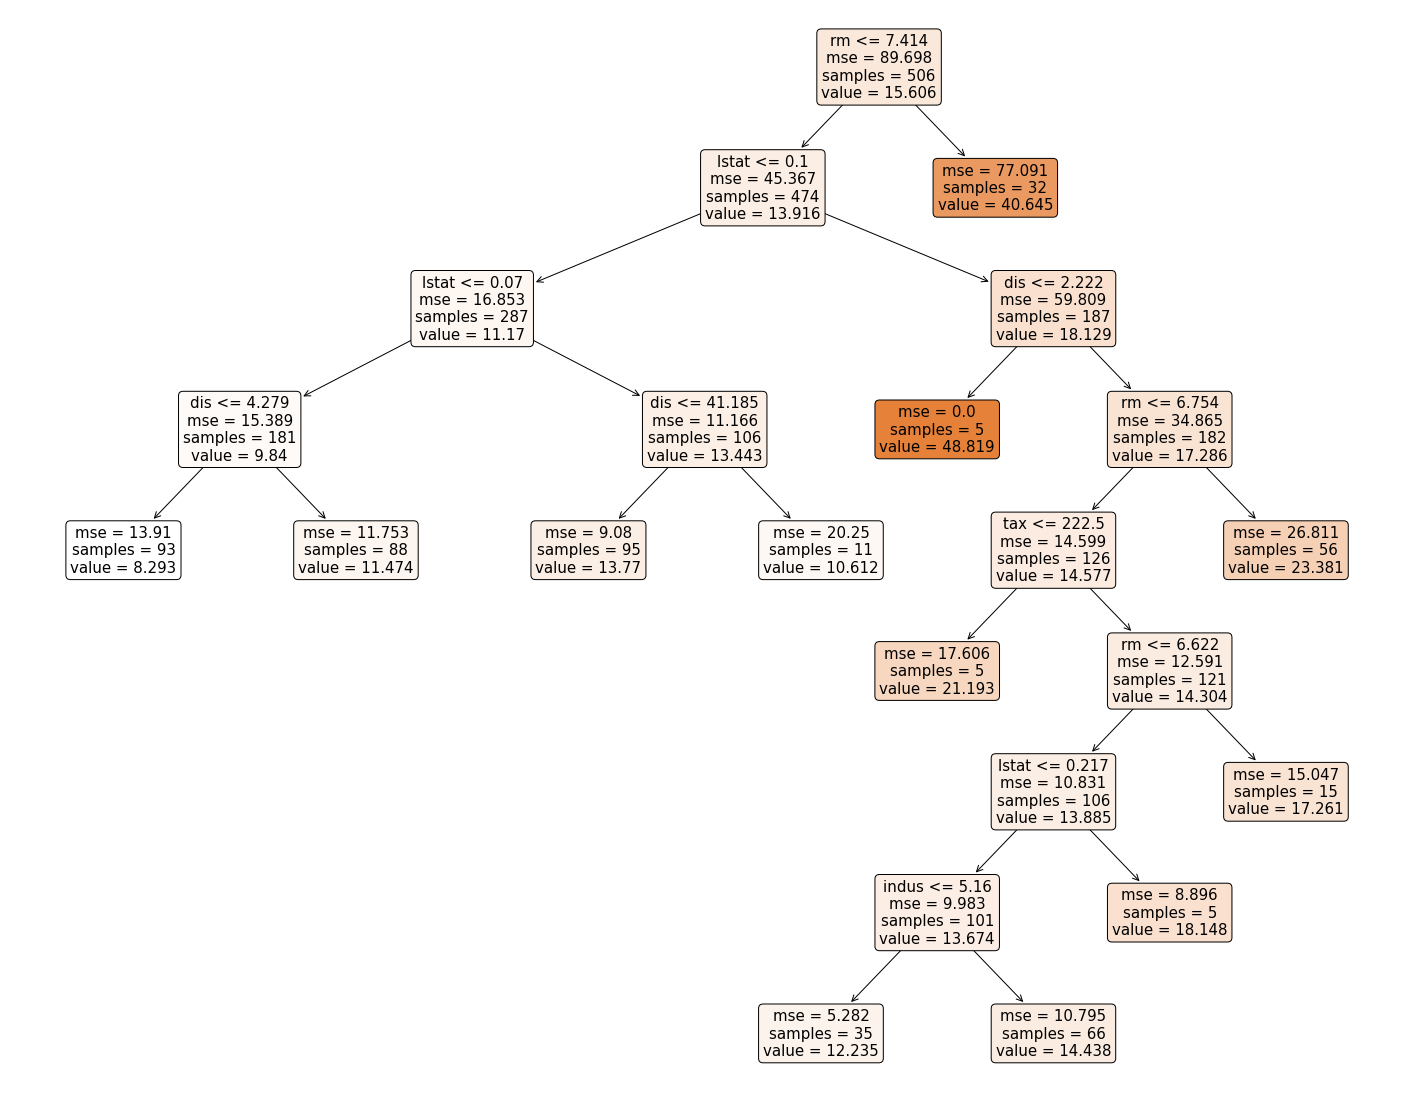

In [64]:
tree = DecisionTreeRegressor(min_samples_split=100)
tree.fit(X, y)
plt.figure(figsize=(25,20))
plot_tree(tree, rounded=True, filled=True, feature_names=boston_EDA.columns.values, fontsize=15);

We will explore the most right prediction pathway which consists of 5 nodes. At each node in the pathway, there will some sort of interregator which determineds what feature and value will provide the most useful split. At the frist node, the most usefule feature is rm and the split value is 7.414. This means that any instances that has a rm value of less than or equal to 7.414 will be directed to the right which is the path of interest. The next node then considers the lstat feature and the split value is 0.1. Any instances with lstat less or equal to 0.1 will go down the path. Next, the dis feature is considered and any instances with dis less than or equals to 4.279 will go down the path to the final node or the leaf with the value of 8.293. Any instances with dis greater than 4.279 will do down to the leaf that has a value of 11.474.